<a href="https://colab.research.google.com/github/reneronaldo10/PROCESAMIENTO-DE-IMAGENES/blob/main/PRACTICAS/Practica_06_Introducci%C3%B3n_a_OpenCV_Operaciones_de_punto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 6: OpenCV y Operaciones de punto
```

# <font color=#FF0000>OpenCV</color>

* Mas de 2500 algoritmos optimizados

* C/C++, Python, Java y MATLAB, soporta Windows, Linux, Android y Mac OS

* Cuda y OpenCL (Actualmente en desarrollo)

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Leer y mostrar una imagen con OpenCV**

Lectura -> cv2.imread(ruta de imagen, opc*)
 * Corregir colores usando indexación
 * Corregir colores cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 * opc -> cv2.IMREAD_GRAYSCALE

In [10]:
imgSRC = 'robotSofia.jpg'

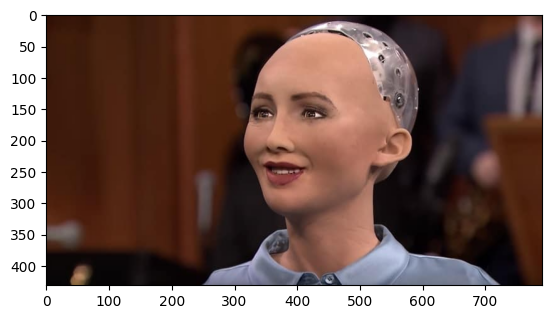

In [11]:
img = cv2.imread(imgSRC) #[..., ::-1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

P1. Que sucede si usamos matplotlib para mostrar una imágen leída con openCV?

Los ejes en matploitb se invierten o sea "x" es veritcal y "y" es horizontal ademas usa RGB. Ya que en openCV es todo lo contrario y usa BGR.

### **Consideraciones al mostrar imagenes con matplotlib**
 * Se realiza un autoescalado

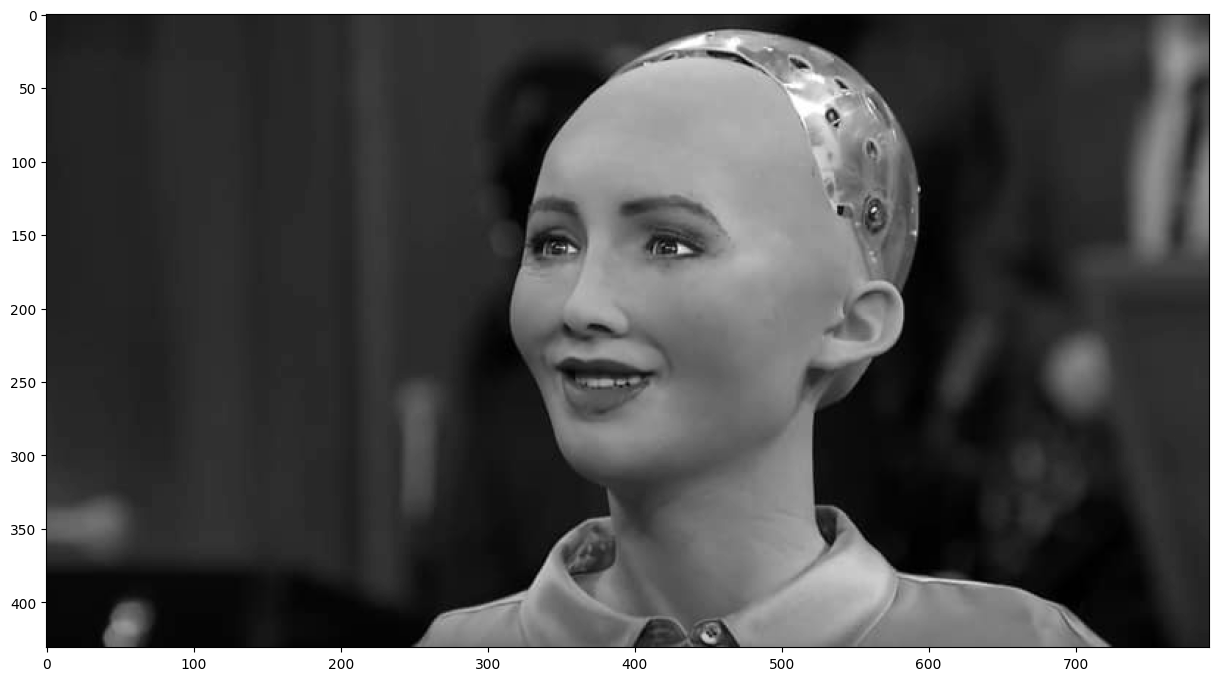

In [12]:
img = cv2.imread(imgSRC,0)
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

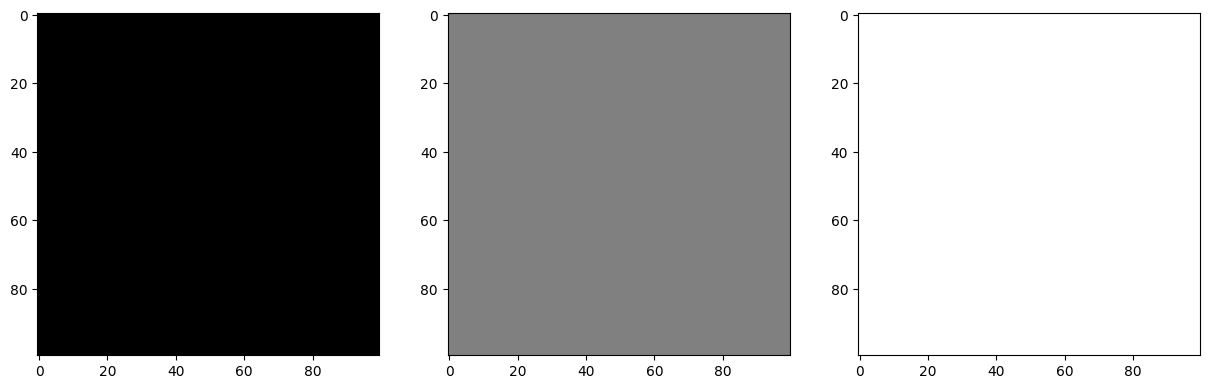

In [13]:
black = np.zeros([100, 100], dtype=np.uint8)
gray = np.ones([100, 100], dtype=np.uint8) * 128
white = np.ones([100, 100], dtype=np.uint8) * 255

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.imshow(black, cmap='gray', vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(133)
plt.imshow(white, cmap='gray', vmin=0, vmax=255)
plt.show()

P2. Explique la utilidad de vmin y vmax y cuando es importante tenerlo en cuenta

### **Escalando los colores y dibujando dentro de una imagen**


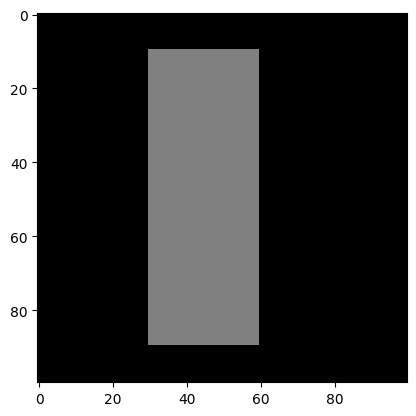

In [14]:
black = np.zeros([100, 100], dtype=np.uint8)
black[10:90, 30:60] = 128

black = black/255

plt.imshow(black, cmap='gray', vmin=0, vmax=1)
plt.show()

P3. Que tipo de dato es la imagen despues de dividir entre 255?
P4. Explique como funcionan los ejes en las imágenes mostradas en python.

### **Creando formas dentro de una imagen con numpy y OpenCV**
 * cv2.rectangle(img, pt1, pt2, (color RGB), thickness= )
 * cv2.line(img, pt1, pt2, (color RGB),thickness= )

#### (El cuadrado rojo es realizado con numpy.  El cuadrado verde es realizado con OpenCV)

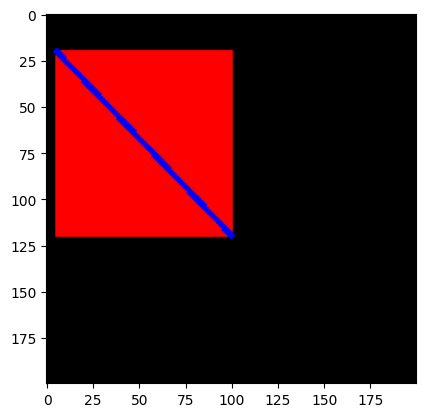

In [15]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (5, 20)
PT2 = (100,120)
cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

* cv2.circle(img, (centro), radio, (color), thickness=)

* cv2.putText(img, "Texto", (punto de inicio), fuente, tamaño, (color), thickness=)
 * fuente -> cv2.FONT_HERSHEY_SIMPLEX

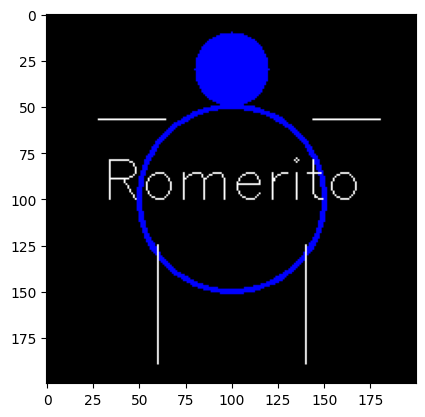

In [47]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (0, 20)
PT2 = (100,120)

# cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
# cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)
cv2.circle(black, (100,30), 20, (255,0,0), thickness=-1)
cv2.circle(black, (100,100), 50, (255,0,0), thickness=2)
cv2.putText(black, "-  -", (20,75), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), thickness=1)
cv2.putText(black, "Romerito", (30,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), thickness=1)
cv2.putText(black, " |  |", (20,175), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), thickness=1)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

### Cambiar tamaño de una imagen con OpenCV-> [resize](https://pythonexamples.org/python-opencv-cv2-resize-image/)

cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)

*******
* INTER_NEAREST
* INTER_LINEAR
* INTER_AREA
* INTER_CUBIC
* INTER_LANCZOS4

Dimensiones originales: (431, 791, 3)


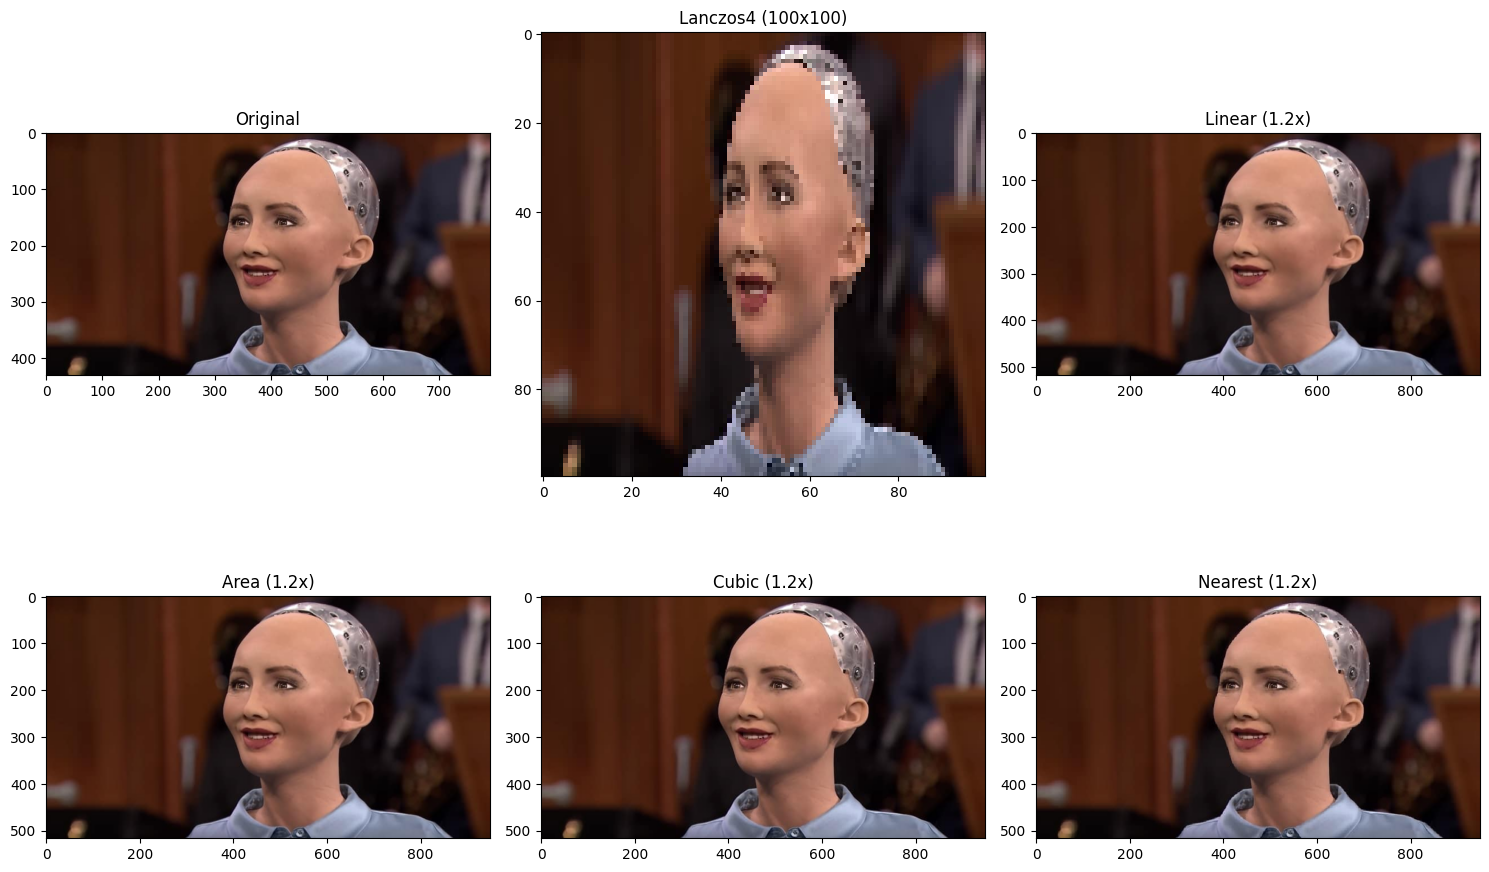

In [63]:
img = cv2.imread(imgSRC)[...,::-1]

# img_resize_small = cv2.resize(img, None, fx=1/2, fy=1/3, interpolation=cv2.INTER_LINEAR)
img_resize_small = cv2.resize(img, (100,100), interpolation=cv2.INTER_LANCZOS4)
img_resize_big = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
img_resize_area = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_AREA)
img_resize_cubic = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
img_resize_nearest = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_NEAREST)

# Mostrar las dimensiones originales
print(f"Dimensiones originales: {img.shape}")

# Crear subplots
plt.subplots(2, 3, figsize=(15, 10))

# Imagen original
plt.subplot(231)
plt.imshow(img)
plt.title('Original')

# Lanczos4
plt.subplot(232)
plt.imshow(img_resize_small)
plt.title('Lanczos4 (100x100)')

# Linear
plt.subplot(233)
plt.imshow(img_resize_big)
plt.title('Linear (1.2x)')

# Area
plt.subplot(234)
plt.imshow(img_resize_area)
plt.title('Area (1.2x)')

# Cubic
plt.subplot(235)
plt.imshow(img_resize_cubic)
plt.title('Cubic (1.2x)')

# Nearest
plt.subplot(236)
plt.imshow(img_resize_nearest)
plt.title('Nearest (1.2x)')

# Mostrar todas las imágenes
plt.tight_layout()
plt.show()

P5. Cree un bucle para mostrar la imágen original y el efecto de las 5 diferentes interpolaciones al escalar a la mitad su ancho y largo. Se nota la diferencia?

### Mostrar imagen con OpenCV en una ventana
cv2.imshow(nombre de ventana, imagen)
* cv2.waitKey(0)  
* cv2.destroyAllWindows()  

In [48]:
img = cv2.imread(imgSRC)
cv2.imshow('Robot Sofia', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


# <font color=#FF0000>Operaciones de punto</color>


### Negativo de una imagen

* s = 255- f(r)

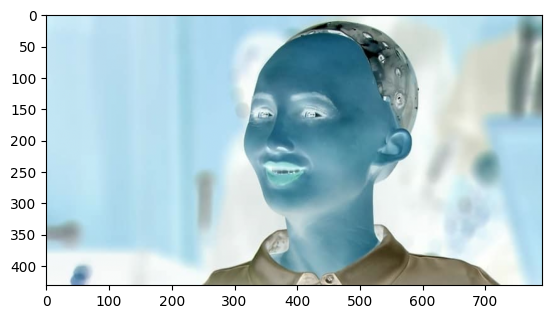

In [51]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = 1-r
plt.imshow(s)
plt.show()

### Tranformacion Logarítmica
* s = c.log(1+r)

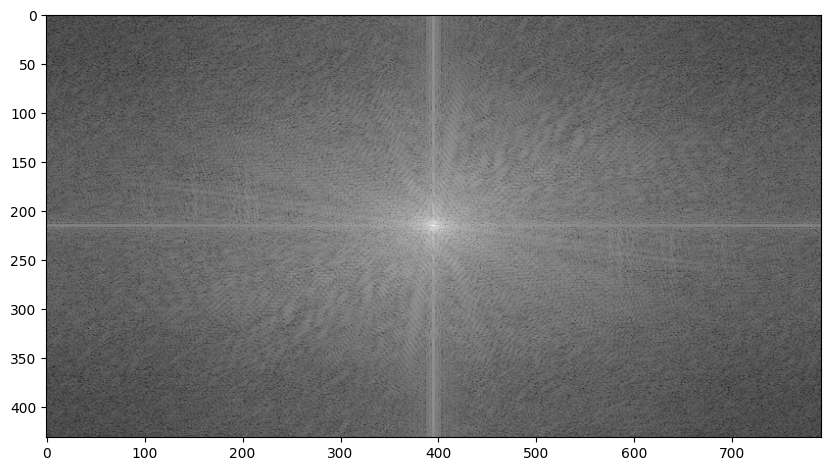

In [52]:
img = cv2.imread(imgSRC, 0)

fft_2 = np.fft.fft2(img)
fft_2_abs = np.abs(fft_2)
fft_2_abs = np.fft.fftshift(fft_2_abs)
fft_2_abs_log = np.log(fft_2_abs+1)

plt.figure(figsize=(10,15))
plt.imshow(fft_2_abs_log, cmap='gray')
plt.show()

P6. Compruebe cuanto son los valores mínimo y máximo de la imagen original y de la imágen que muestra el espectro. Luego describa que efecto tuvo la transformación logarítmica.

### Transformación Gamma
###   $s=cr^\gamma $

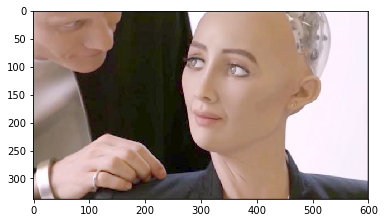

In [ ]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = r**2.3
plt.imshow(s)
plt.show()

### Transformación arbitraria
* ####   Especificar una funcion de transformacion
cv2.LUT(img, lut)

In [ ]:
img.shape

(337, 600)

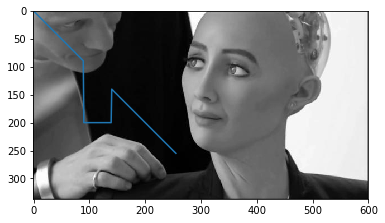

In [ ]:
funcion_ejemplo = np.arange(256)
funcion_ejemplo[90: 140] = 200

img = cv2.imread(imgSRC,0)
img_out = np.empty_like(img)
for m in range(img.shape[0]):
    for n in range(img.shape[1]):
        img_out[m,n] = funcion_ejemplo[img[m,n]]

plt.plot(funcion_ejemplo)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)

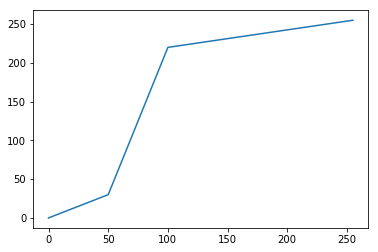

In [ ]:
r = np.zeros(256)

for pix in range(256):
    if pix < 50:
        r[pix] = 30/50*(pix-50) + 30
    if 50 <=pix < 100:
        r[pix] = 190/50*(pix-50) + 30
    if 100 <=pix:
        r[pix] = 35/155*(pix-100) + 220

plt.plot(r)
plt.show()

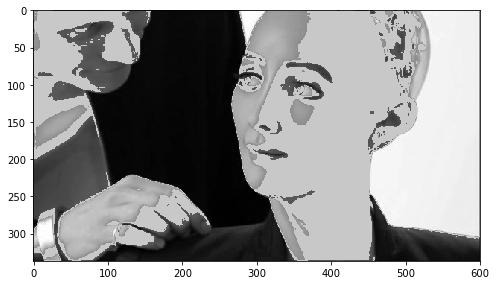

In [ ]:
img = cv2.imread(imgSRC,0)
s=cv2.LUT(img, funcion_ejemplo)
plt.figure(figsize=(8,10))
plt.imshow(s, cmap='gray')
plt.show()

### División en capas de bits

* np.bitwise_and(imagen, bit)

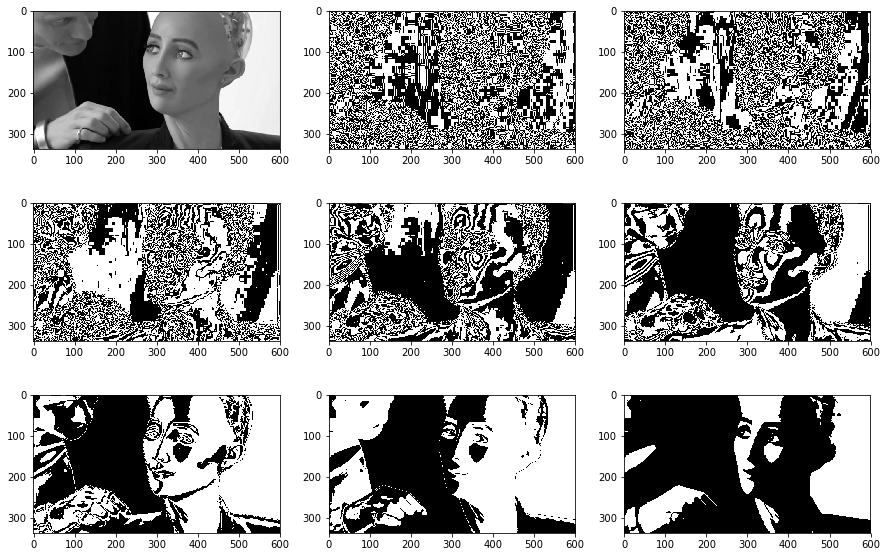

In [ ]:
img = cv2.imread(imgSRC, 0)

img7 = cv2.bitwise_and(img, 128)
img6 = cv2.bitwise_and(img, 64)
img5 = cv2.bitwise_and(img, 32)
img4 = cv2.bitwise_and(img, 16)
img3 = cv2.bitwise_and(img, 8)
img2 = cv2.bitwise_and(img, 4)
img1 = cv2.bitwise_and(img, 2)
img0 = cv2.bitwise_and(img, 1)

plt.figure(figsize=(15, 10))
plt.subplot(331)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(332)
plt.imshow(img0, cmap="gray")
plt.subplot(333)
plt.imshow(img1, cmap="gray")
plt.subplot(334)
plt.imshow(img2, cmap="gray")
plt.subplot(335)
plt.imshow(img3, cmap="gray")
plt.subplot(336)
plt.imshow(img4, cmap="gray")
plt.subplot(337)
plt.imshow(img5, cmap="gray")
plt.subplot(338)
plt.imshow(img6, cmap="gray")
plt.subplot(339)
plt.imshow(img7, cmap="gray")

#### Mostrar solo las 5 capas mas significativas

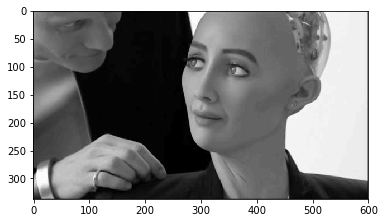

In [ ]:
img_comprimida = img7+ img6 + img5 + img4 + img3 + img2
plt.imshow(img_comprimida, cmap="gray", vmin=0, vmax=255)

P7. Si usted quisiera encriptar un  mensaje dentro de una fotografía, como lo haría?

### Histograma de una imagen
* np.histogram(img, bins, [rango de datos])  (requiere plotear)
* plt.hist(img.ravel(), bins, [rango de datos])
* cv2.calcHist([img], [canal], mascara,[bins], [rango de datos])

#####  Normalizar CDF $ \frac{cdf*hist.max}{cdf.max} $

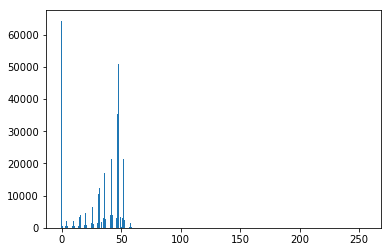

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

hist, bins = np.histogram(img_gray, 256, [0, 256])
plt.bar(np.arange(256), hist)
plt.show()

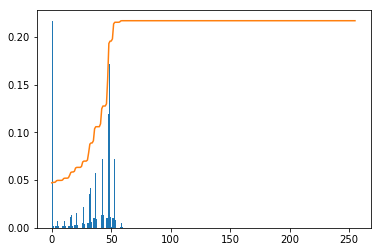

In [ ]:
#matplotlib
hist = plt.hist(img_gray.ravel(), 256, [0,256], density=True)
cdf = np.cumsum(hist[0])
cdf_norm = cdf*(hist[0].max())/(cdf.max())
plt.plot(cdf_norm)

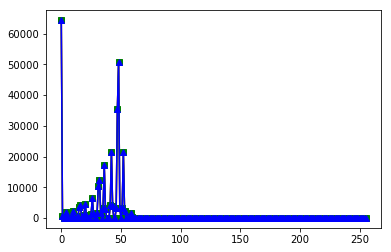

In [ ]:
# openCV
color = ("r*-", "gs-", "b^-")
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None,[256], [0,256])
    plt.plot(hist, col)

### Equalización de Histograma
* cv2.equalizeHist(img)

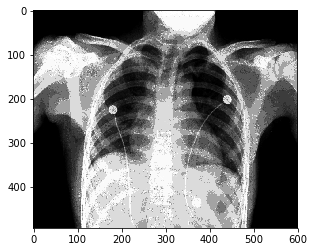

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

img_equ = cv2.equalizeHist(img_gray)
plt.imshow(img_equ, cmap="gray", vmin=0, vmax=255)

P8. Que sucede durante la equalización de histograma?

### Equalización de Histograma adaptativa
*clahe = createCLAHE()
*clahe.apply(img)

* [CLAHE Histogram Eqalization](https://www.geeksforgeeks.org/clahe-histogram-eqalization-opencv/)

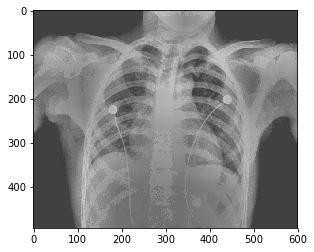

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(img_gray) + 60

plt.imshow(final_img, cmap="gray", vmin=0, vmax=255)

## Histogram Matching
https://www.pyimagesearch.com/2021/02/08/histogram-matching-with-opencv-scikit-image-and-python/
https://automaticaddison.com/how-to-do-histogram-matching-using-opencv/
